In [74]:
import numpy as np     
# import pandas as pd     
from scipy import stats
# import seaborn as sns
import math
import matplotlib.pyplot as plt


%matplotlib inline

In [75]:
np.random.seed(seed=1234) 
x1_size = 300
x1_k = 2
x1_m = x1_k;
x1_sig = 2 * x1_k;


x1 = stats.chi2(x1_k).rvs(x1_size)

x1_mean = np.mean(x1)
x1_var = np.var(x1)
x1_std = math.sqrt(x1_var) 

print(f"X1: mean = {x1_mean:.3f}; var = {x1_var:.3f}; std = {x1_std:.3f}; size = {x1_size:.3f}")

X1: mean = 2.088; var = 3.702; std = 1.924; size = 300.000


In [76]:
x2_size = 300
x2_m = x1_k;
x2_sig = 2 * x1_k;
x2 = stats.norm(3, 1).rvs(x2_size)


x2_mean = np.mean(x2)
x2_var = np.var(x2)
x2_std = math.sqrt(x2_var) 

print(f"X2: mean = {x2_mean:.3f}; var = {x2_var:.3f}; std = {x2_std:.3f}; size = {x2_size:.3f}")

X2: mean = 2.984; var = 0.860; std = 0.927; size = 300.000


In [77]:
pooled = np.concatenate((x1, x2)) 

pooled_size = pooled.size;
pooled_mean = np.mean(pooled)
pooled_var = np.var(pooled)
pooled_std = math.sqrt(pooled_var) 

print(f"pooled: mean = {pooled_mean:.3f}; var = {pooled_var:.3f}; std = {pooled_std:.3f}; size = {pooled_size:.3f}")

pooled: mean = 2.536; var = 2.482; std = 1.575; size = 600.000


In [114]:
#let alpha be 0.3
def calc_s0_squared(x, m):
  sum = 0
  for el in x:
    sum += (el - m)**2
  return sum / x.size

#z-test
m0 = 2
statistic = (x1_mean - m0) * x1_size**(1/2) / x1_sig
F = stats.norm(0, 1).cdf(statistic)
pvalue = 2 * min(F, 1 - F)
print(f"X1 z-test: m0 = {m0:.3f}; stat = {statistic:.3f}; pvalue = {pvalue:.3f}")

#t-test
m0 = 2.1
result = stats.ttest_1samp(x1, m0)
print(f"X1 t-test: m0 = {m0:.3f}; stat = {result.statistic:.3f}; pvalue = {result.pvalue:.3f}")

#chi2-test, m is known
sig0_squared = 4.2
#выб оценка дисперсии
s0_squared = calc_s0_squared(x1, x1_m)

statistic = x1_size * s0_squared / sig0_squared
F = stats.chi2(x1_size).cdf(statistic)
pvalue = 1 - F
print(f"X1 chi2-test, m is known: sig0_squared = {sig0_squared:.3f}; stat = {statistic:.3f}; pvalue = {pvalue:.3f}")

def chi2test(x, sig0_squared):
  statistic = (x.size - 1) * x.var() / sig0_squared
  F = stats.chi2(x.size - 1).cdf(statistic)
  pvalue = 2 * min(1 - F, F)
  return pvalue, statistic

#chi2-test, m is unknown
sig0_squared = 4
# statistic = (x1_size - 1) * x1_var / sig0_squared
# F = stats.chi2(x1_size - 1).cdf(statistic)
# pvalue = 2 * min(F, 1 - F)
pvalue, statistic = chi2test(x1, sig0_squared)
print(f"X1 chi2-test, m is unknown: sig0_squared = {sig0_squared:.3f}; stat = {statistic:.3f}; pvalue = {pvalue:.3f}")

X1 z-test: m0 = 2.000; stat = 0.380; pvalue = 0.704
X1 t-test: m0 = 2.100; stat = -0.898; pvalue = 0.370
X1 chi2-test, m is known: sig0_squared = 4.200; stat = 241.671; pvalue = 0.994
X1 chi2-test, m is unknown: sig0_squared = 4.000; stat = 252.907; pvalue = 0.050


In [79]:
#2 sample tests
#t-test
result = stats.ttest_ind(x1, x2)
print(f"2 sample t-test: stat = {result.statistic:.3f}; pvalue = {result.pvalue}")

#f-test
s01_squared = calc_s0_squared(x1, x1_m)
s02_squared = calc_s0_squared(x2, x2_m)
statistic = s01_squared / s02_squared
F = stats.f(x1_size, x2_size).cdf(statistic)
pvalue = 2*min(1 - F, F)
print(f"2 sample f-test (known m): stat = {statistic:.3f}; pvalue = {pvalue}")

statistic = x1_var / x2_var
F = stats.f(x1_size - 1, x2_size - 1).cdf(statistic)
pvalue = 2*min(1 - F, F)
print(f"2 sample f-test (unknown m): stat = {statistic:.3f}; pvalue = {pvalue}")

2 sample t-test: stat = -7.254; pvalue = 1.2581751131153937e-12
2 sample f-test (known m): stat = 2.030; pvalue = 6.611087233210355e-10
2 sample f-test (unknown m): stat = 4.306; pvalue = 1.1102230246251565e-16


In [101]:
sig0_squared = 4
n = 1000
z = list()
p = list()

for i in range(n):
    x1 = stats.chi2(2).rvs(x1_size)
    pvalue, statistic = chi2test(x1, sig0_squared)
    z.append(statistic)
    p.append(pvalue)

mean_z = np.mean(z)
var_z = np.var(z)
std_z = np.std(z)

mean_p = np.mean(p)
var_p = np.var(p)
std_p = np.std(p)

print("mean_z = %.3f; var_z = %.3f; std_z = %.3f" % (mean_z, var_z, std_z))
print("mean_p = %.3f; std_z = %.3f; std_p = %.3f" % (mean_p, var_p, std_p))

mean_z = 298.483; var_z = 2541.904; std_z = 50.417
mean_p = 0.293; std_z = 0.095; std_p = 0.308


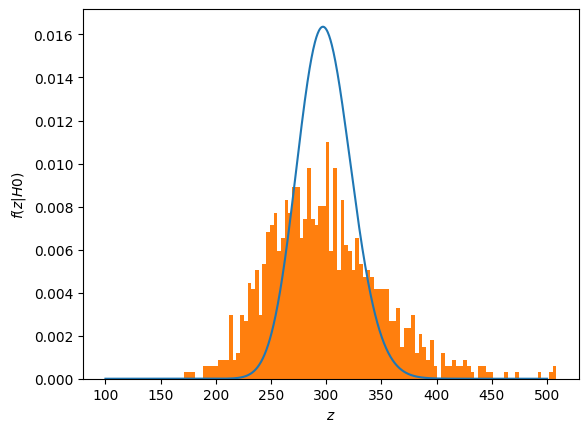

In [112]:
x = np.linspace(100, 500, 1000)
plt.plot(x, stats.chi2(x1_size - 1).pdf(x))
plt.ylabel('$f(z|H0)$')
plt.xlabel('$z$');
_ = plt.hist(z, bins=100, density=True)

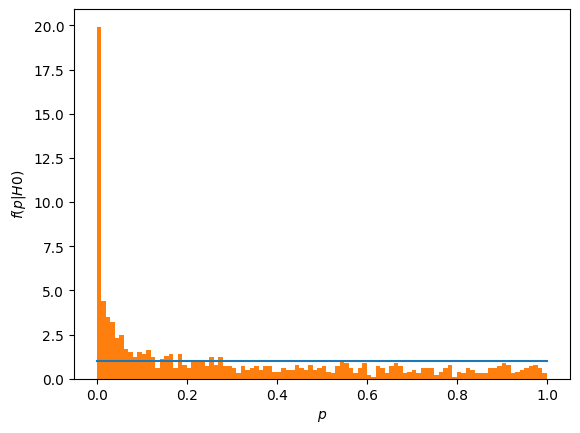

In [113]:
x = np.linspace(0, 1, 100)
plt.plot(x, stats.uniform(0, 1).pdf(x))
plt.ylabel('$f(p|H0)$')
plt.xlabel('$p$');
_ = plt.hist(p, bins=100, density=True)